<a href="https://colab.research.google.com/github/nargyanti/IPCV_Genap_2022/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

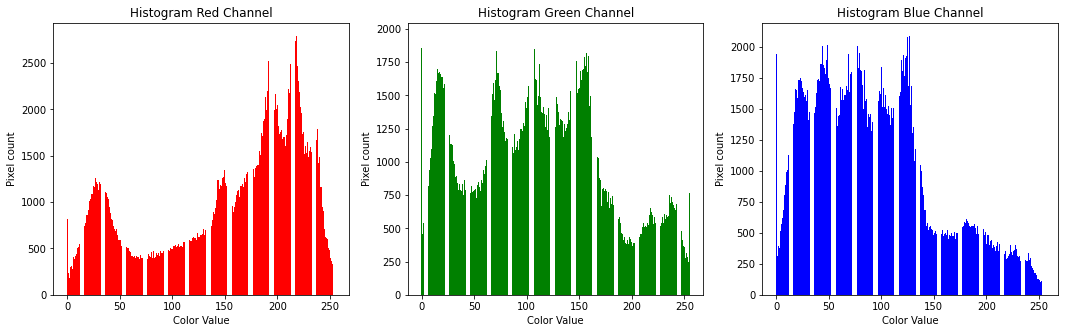

In [ ]:
# No 3
def getIntensity(image, intensity):
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):            
      intensity[image[y, x]] += 1  
  return intensity   

def createBarPlot(image, intensity, color):
  plt.bar(color_range, getIntensity(image, intensity), color = color)
  plt.title('Histogram ' + color + ' Channel')  
  plt.xlabel('Color Value'); plt.ylabel('Pixel count')

original = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
color_range = np.arange(256)

# Create array to save intensity value
red_intensity = [0] * 256
green_intensity = [0] * 256
blue_intensity = [0] * 256

(B, G, R) = cv.split(original)

plt.figure(figsize=(18,5)) 
plt.subplot(1,3,1)
createBarPlot(R, red_intensity, 'Red')
plt.subplot(1,3,2)
createBarPlot(G, green_intensity, 'Green')
plt.subplot(1,3,3)
createBarPlot(B, blue_intensity, 'Blue')

plt.show()

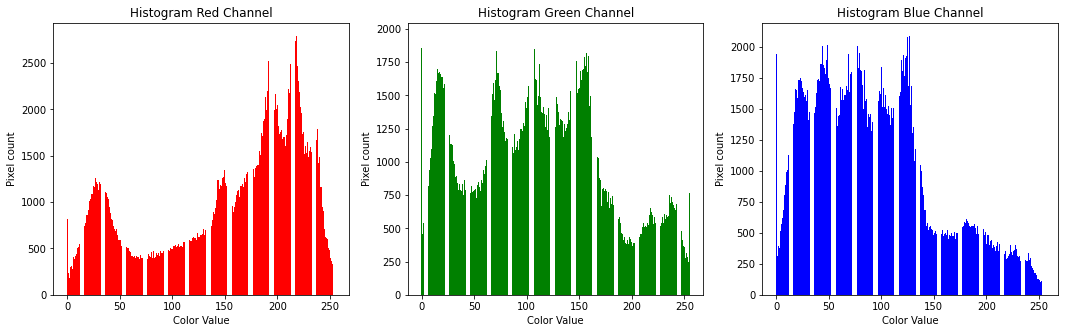

In [ ]:
# No 4
def getIntensity(image):
  intensity, bin_edges = np.histogram(image, bins=256)
  return intensity

def createBarPlot(image, color):
  plt.bar(color_range, getIntensity(image), color = color)
  plt.title('Histogram ' + color + ' Channel')  
  plt.xlabel('Color Value'); plt.ylabel('Pixel count')

original = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
color_range = np.arange(256)

(B, G, R) = cv.split(original)

plt.figure(figsize=(18,5))    
plt.subplot(1,3,1)
createBarPlot(R, 'Red')
plt.subplot(1,3,2)
createBarPlot(G, 'Green')
plt.subplot(1,3,3)
createBarPlot(B, 'Blue')

plt.show()

512  x  512


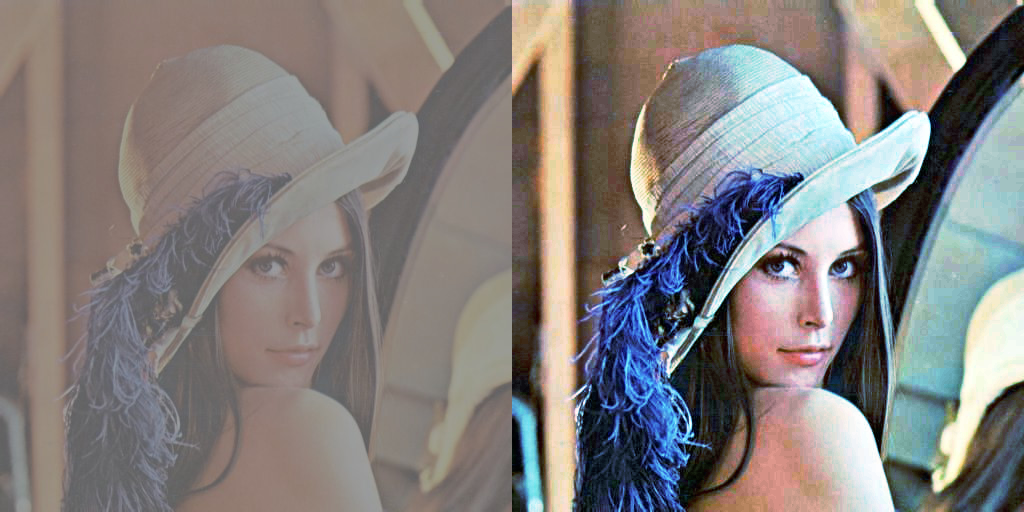

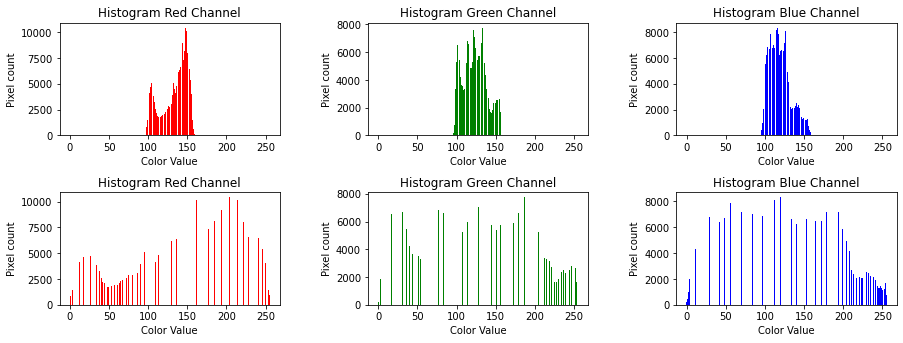

In [ ]:
# No 5
def getFrequency(image, frequency):
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      frequency[image[y, x]] += 1  
  return frequency  

def getEqualizationHistogram(normalized):
  equalized_value = [0] * 256
  for i in range(256):
    equalized_value[i] = round(normalized[i] * 255)
    # equalized_value[i] = round((cumsum[i] * 255)/512*512)
  return equalized_value

def createNewImage(image, equalized_array):
  new_image = np.zeros(image.shape, image.dtype)
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
      new_image[y, x] = equalized_array[image[y, x]]
  return new_image

def createBarPlot(intensity, color):
  plt.bar(color_range, intensity, color = color)
  plt.title('Histogram ' + color + ' Channel')  
  plt.xlabel('Color Value'); plt.ylabel('Pixel count')

# Import image
original = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
print(original.shape[0], ' x ', original.shape[1]) # to know image size

# Split into BGR
(B, G, R) = cv.split(original)

# Calculate frequency
frequency_red = getFrequency(R, [0] * 256)
frequency_green = getFrequency(G, [0] * 256)
frequency_blue = getFrequency(B, [0] * 256)

# Calculate cummulative frequency
cumsum_red = np.cumsum(frequency_red)
cumsum_green = np.cumsum(frequency_green)
cumsum_blue = np.cumsum(frequency_blue)

# Normalize frequency
normalized_red = cumsum_red / np.sum(frequency_red)
normalized_green = cumsum_green / np.sum(frequency_green)
normalized_blue = cumsum_blue / np.sum(frequency_blue)

# Equalization histogram
equalized_red = getEqualizationHistogram(normalized_red)
equalized_green = getEqualizationHistogram(normalized_green)
equalized_blue = getEqualizationHistogram(normalized_blue)

# Create new image 
new_image_red = createNewImage(R, equalized_red)
new_image_green = createNewImage(G, equalized_green)
new_image_blue = createNewImage(B, equalized_blue)
new_image = cv.merge((new_image_blue, new_image_green, new_image_red))

# Show image
final_frame = cv.hconcat((original, new_image))
cv2_imshow(final_frame)

# Show plot
plt.figure(figsize=(15,4))
plt.subplot(2,3,1)
createBarPlot(frequency_red, 'Red')
plt.subplot(2,3,2)
createBarPlot(frequency_green, 'Green')
plt.subplot(2,3,3)
createBarPlot(frequency_blue, 'Blue')
plt.subplot(2,3,4)
createBarPlot(getFrequency(new_image_red, [0] * 256), 'Red')
plt.subplot(2,3,5)
createBarPlot(getFrequency(new_image_green, [0] * 256), 'Green')
plt.subplot(2,3,6)
createBarPlot(getFrequency(new_image_blue, [0] * 256), 'Blue')
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)

plt.show()

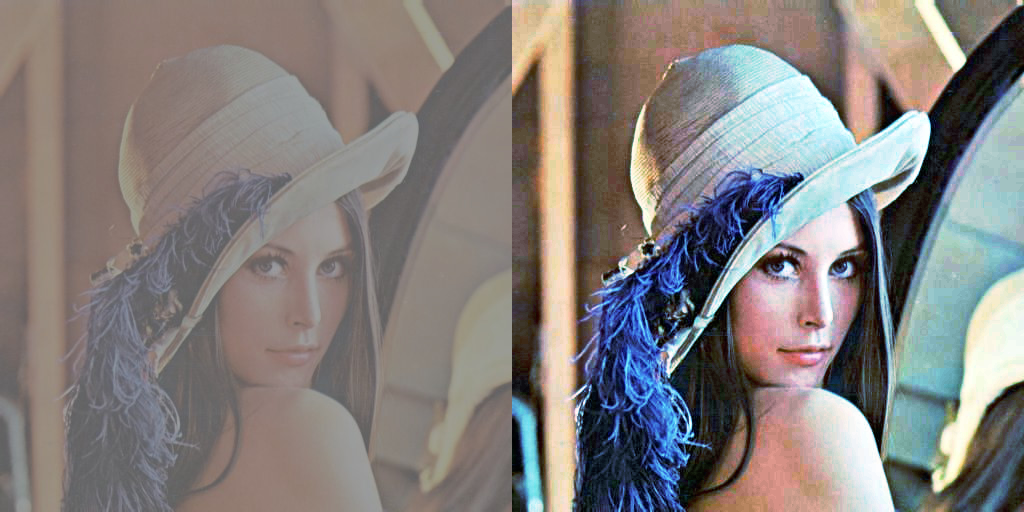

In [ ]:
# No 6
original = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
equalized_image = np.zeros(original.shape, original.dtype)

b, g, r = cv.split(original)
red = cv.equalizeHist(r)
green = cv.equalizeHist(g)
blue = cv.equalizeHist(b)
equalized_image = cv.merge((blue, green, red))

final_frame = cv.hconcat((original, equalized_image))
cv2_imshow(final_frame)

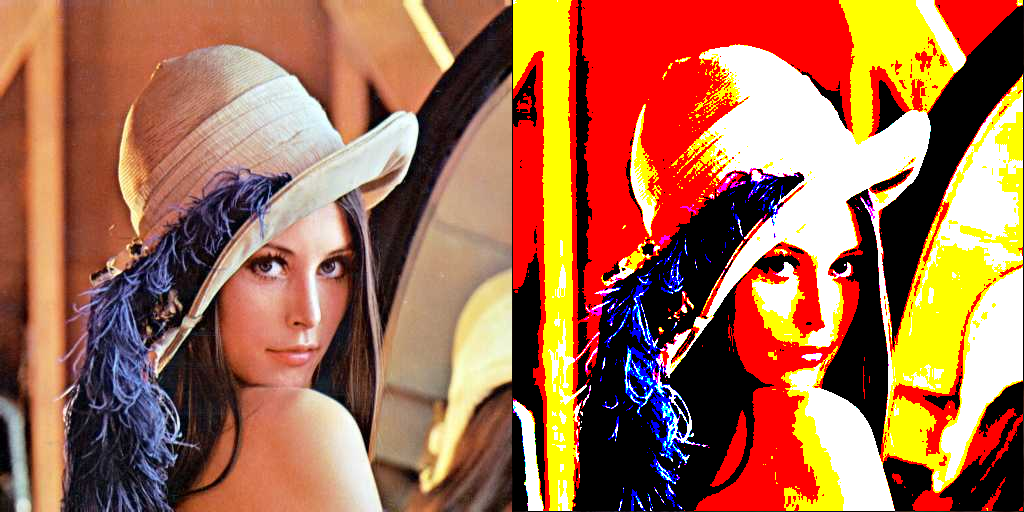

In [ ]:
# No 7
def threshold(color):
  if color > 255:
    return 255
  elif color < 0:
    return 0
  else:
    return color

original = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

(B, G, R) = cv.split(original)
img_pixel_blue = np.zeros(B.shape, B.dtype)
img_pixel_green = np.zeros(G.shape, G.dtype)
img_pixel_red = np.zeros(R.shape, R.dtype)

for y in range(0, R.shape[0] - 1):
  for x in range(1, R.shape[1] - 1):
    pixel_blue_old = B[y, x]
    pixel_green_old = G[y, x]
    pixel_red_old = R[y, x]
    pixel_distance = 1

    pixel_blue_new = np.round(pixel_distance * pixel_blue_old / 255) * (255 / pixel_distance)
    pixel_green_new = np.round(pixel_distance * pixel_green_old / 255) * (255 / pixel_distance)
    pixel_red_new = np.round(pixel_distance * pixel_red_old / 255) * (255 / pixel_distance)

    img_pixel_blue[y, x] = pixel_blue_new
    img_pixel_green[y, x] = pixel_green_new
    img_pixel_red[y, x] = pixel_red_new

    error_blue = pixel_blue_old - pixel_blue_new
    error_green = pixel_green_old - pixel_green_new
    error_red = pixel_red_old - pixel_red_new

    img_pixel_blue[y, x + 1] = threshold(img_pixel_blue[y, x + 1] + error_blue * 7/16)
    img_pixel_green[y, x + 1] = threshold(img_pixel_green[y, x + 1] + error_green * 7/16)
    img_pixel_red[y, x + 1] = threshold(img_pixel_red[y, x + 1] + error_red * 7/16)
    
    img_pixel_blue[y + 1, x - 1] = threshold(img_pixel_blue[y + 1, x - 1] + error_blue * 3/16)
    img_pixel_green[y + 1, x - 1] = threshold(img_pixel_green[y + 1, x - 1] + error_green * 3/16)
    img_pixel_red[y + 1, x - 1] = threshold(img_pixel_red[y + 1, x - 1] + error_red * 3/16)
    
    img_pixel_blue[y + 1, x] = threshold(img_pixel_blue[y + 1, x] + error_blue * 5/16)
    img_pixel_green[y + 1, x] = threshold(img_pixel_green[y + 1, x] + error_green * 5/16)
    img_pixel_red[y + 1, x] = threshold(img_pixel_red[y + 1, x] + error_red * 5/16)
  
    img_pixel_blue[y + 1, x + 1] = threshold(img_pixel_blue[y + 1, x + 1] + error_blue * 1/16)
    img_pixel_green[y + 1, x + 1] = threshold(img_pixel_green[y + 1, x + 1] + error_green * 1/16)
    img_pixel_red[y + 1, x + 1] = threshold(img_pixel_red[y + 1, x + 1] + error_red * 1/16)

new_image = cv.merge((img_pixel_blue, img_pixel_green, img_pixel_red))

final_frame = cv.hconcat((original, new_image))
cv2_imshow(final_frame)

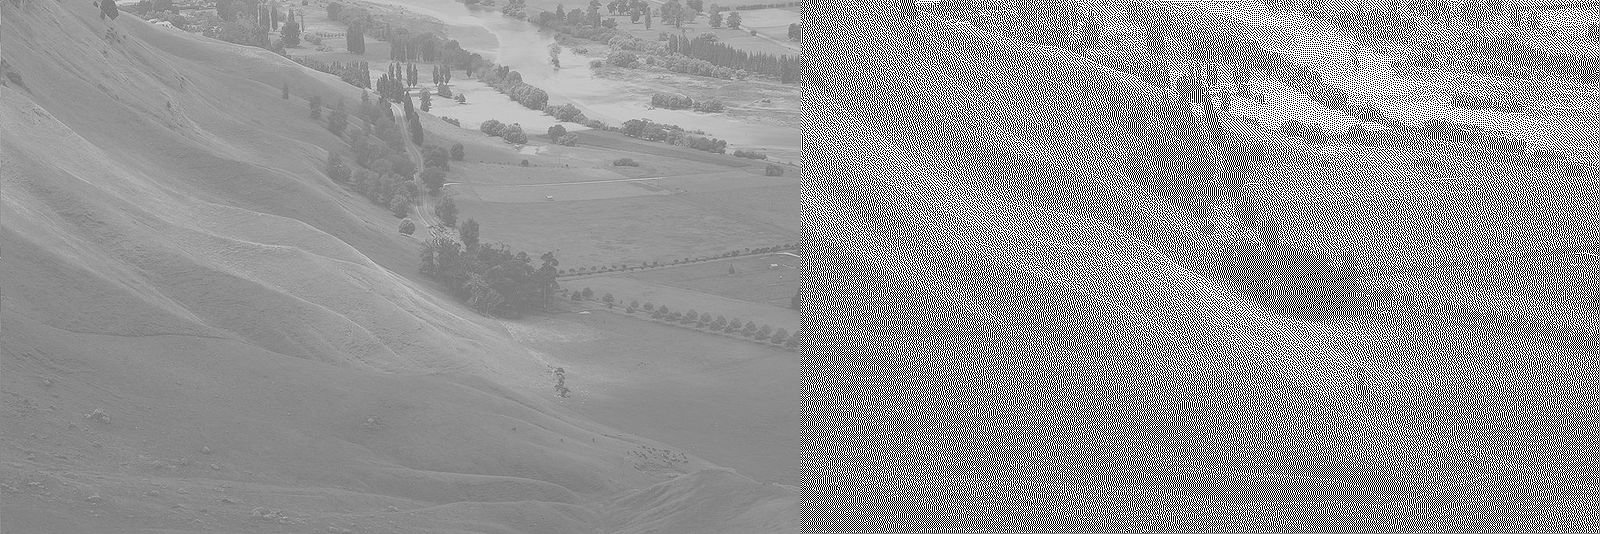

In [ ]:
# No 8
def threshold(color):
  if color > 255:
    return 255
  elif color < 0:
    return 0
  else:
    return color

def convertToBinary(color):
  if(color > 127): 
    return 255
  else: 
    return 0

original = cv.imread('/content/drive/MyDrive/PCVK/wiki.jpg', cv.COLOR_BGR2GRAY)

img_pixel = original.copy()

for y in range(0, original.shape[0] - 1):
  for x in range(1, original.shape[1] - 1):    
    pixel_old = img_pixel[y, x]
    pixel_distance = 1
    pixel_new = np.round(pixel_distance * pixel_old / 255) * (255 / pixel_distance)

    img_pixel[y, x] = pixel_new

    error = pixel_old - pixel_new
    
    img_pixel[y, x + 1] = threshold(img_pixel[y, x + 1] + error * 7/16)      
    img_pixel[y + 1, x - 1] = threshold(img_pixel[y + 1, x - 1] + error * 3/16)      
    img_pixel[y + 1, x] = threshold(img_pixel[y + 1, x] + error * 5/16)      
    img_pixel[y + 1, x + 1] = threshold(img_pixel[y + 1, x + 1] + error * 1/16)

final_frame = cv.hconcat((original, img_pixel))
cv2_imshow(final_frame)